# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
* Does the Smartcab move at all during the simulation?<br>
    The Smartcab didn't move at all during the simulation.<br>
* What kind of rewards is the driving agent receiving?<br>
    When the Smartcab idled at red light, it was awarded postive rewards and when it idled during green light, it was awared negative rewards. <br>
* How does the light changing color affect the rewards? <br>
    During green light, it was awared negative rewards and during red lights, it was awarded postive rewards. 


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
* In the agent.py Python file, choose three flags that can be set and explain how they change the simulation.<br>
    1 Learning: Whether or not the agent is in learning mode. The agent should recognize positive rewards and negative rewards for the actions.<br>
    2 Enforce deadline: whether or not the agent should conform to deadlines.<br>
    3 Grid Size: The number of horizontal and vertical roads agent will navigate in the simulation.<br>
    
* In the environment.py Python file, what Environment class function is called when an agent performs an action?<br>
    The 'act()' function in the Environment class function that is called when an agent performs an action.<br>
* In the simulator.py Python file, what is the difference between the 'render_text()' function and the 'render()' function?<br>
    render function is targeted for screen simulation while render_text is targeted for non-GUI render display of the simulation. Therefore render_text will produce more information than render which is transient.<br>
* In the planner.py Python file, will the 'next_waypoint() function consider the North-South or East-West direction first? <br>
    next_waypoint() function will consider the East-West direction first and then North-South direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


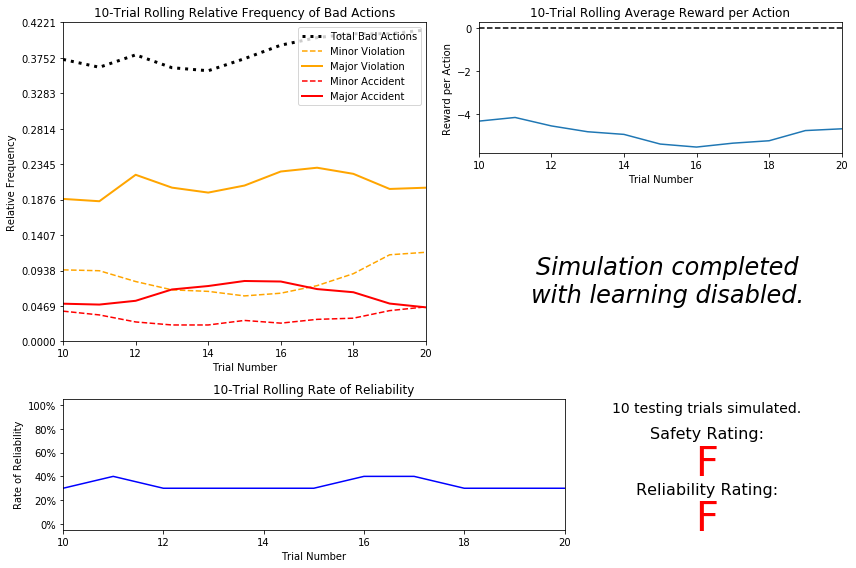

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**<br>
1) The driver was making bad descions about 42% (on an average) of the time. Out of this, almost 8% (on an average) is major accident and almost 6% (on an average) in minor accidents.<br>
2) The reliabilty rating showing an increasing trend doesn't make sense given that major, minor accidents & major violations did not show a decreasing trend. Even though the minor violation showed a decreasing trend, its weightage is far less than other categories.<br>
3) The agent was rewarded on an average -5 rewards per action. I don't think the agent is penalized heavily for the wrong behavior given the litany of major, minor accidents & major violations.<br>
4) I don't think the outcome will be different with the increase in number of trials. Especially when the agent doesn't learn from the mistakes committed & penalities are not proportional to the wrong behavior.<br>
5) This version of the smartcar cannot be considered to be reliable either for safely or reliability given the scores.<br>

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**<br>
**Assumption**: We need to conform US traffic laws. 
The following three features, I think, are pertinent for safety and efficiency:<br>
1) **waypoint** - The direction towards which Smartcab should head is vital to reach its intented destination. If this is incorrect, it would result in wasted effort. <br>
2) **inputs**: <br>
  a) **light** - It is imperative that the Smartcab should know the current state of the traffic light. Major accidents or major violations would occur if Smartcab tries to move without paying attention to red light.  It might be also be penalized for idling when the light is green.<br>
  b) **left** - This parameter is indicative of presence of a vehicle on Smartcar's left in view of its intented direction. If the input is left, the light is green & there is a vehicle present, the resulting action would result in an accident. <br>
  c) **oncoming** - This factor is indicative of an oncoming vehicle. If the light is green, input is left, the Smartcab can make a left turn, provided if there is no oncoming vehicle. Otherwise, it would result in either a minor traffic violation or a major accident.<br>
    
*I would not consider the following features as pertinent as above:*<br>
1) **inputs: right** - This parameter is indicative of presence of a vehicle on the right. We are allowed to make free right turns (subject to certain conditions). If the intended direction is right, the traffic light is green or red and the Smartcab is on the rightmost lane (without a vehicle on the right), this condition is not as perilous as making a left. <br>
2) **deadline**:  I would think that agent should be congizant about the destinaion, waypoint, traffic laws and associated awards and penalities. All other factors are extraneous that driver has no control on. In fact, I would think given a deadline would make the driver make unwanted risks to meet the deadline. Excluding this would make the Q table simpler to manage. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**<br>
1) waypoint can have 4 possible outcomes: {None, Left, Right, Forward}<br>
2) inputs:light can have 2 outcomes: {red, green}<br>
3) inputs:left can have 4 possible outcomes: {None, Left, Right, Forward}<br>
4) inputs:oncoming can have 4 possible outcomes: {None, Left, Right, Forward}<br>
Given these combinations we seem to have 4x2x4x4=128 states.<br>
For each of these 128 states, there is an action associated with it which can be {None, Left, Right, Forward}

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

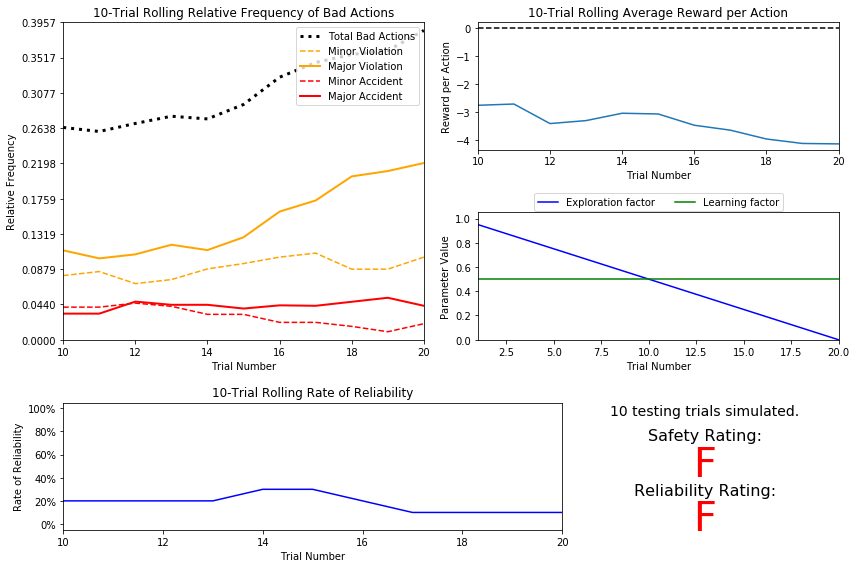

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**<br>
* Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?<br>
    Even though the effective values have changed, major accidents, major violations & minor violations show similar trends. The same case is true with reliabilty rating and rewards.
* Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?<br>
    The agent went thru 20 training trials before requiring testing. I would tend to think that this number doesn't make sense given that there are 128 possible states and it would not be possible to encounter all the possible states & associated rewards & penalities within 20 training sets. Given the linear decaying factor of 0.05 the first half the trial will use random actions and the rest of the trial would try to derive from Q learning.<br> 
* Is the decaying function you implemented for  ϵ (the exploration factor) accurately represented in the parameters panel?
    It is represented in the parameters panel accurately in a  linear fashion.
* As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?<br>
    I could not increase the training runs as the simulator run function switches to testing after 20 training runs or when the epsilon value reaches 0. The decay function linearly decays epsilon value from 1.0 to less than the tolerance of 0.05 within 20 training trials.
* How does the safety and reliability rating compare to the initial driving agent?
    It is the same as the previous one.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

The decay function is epsilon = math.pow(alpha, t), epsilon 1.0, tolerance 0.025, alpha 0.8, tests 10


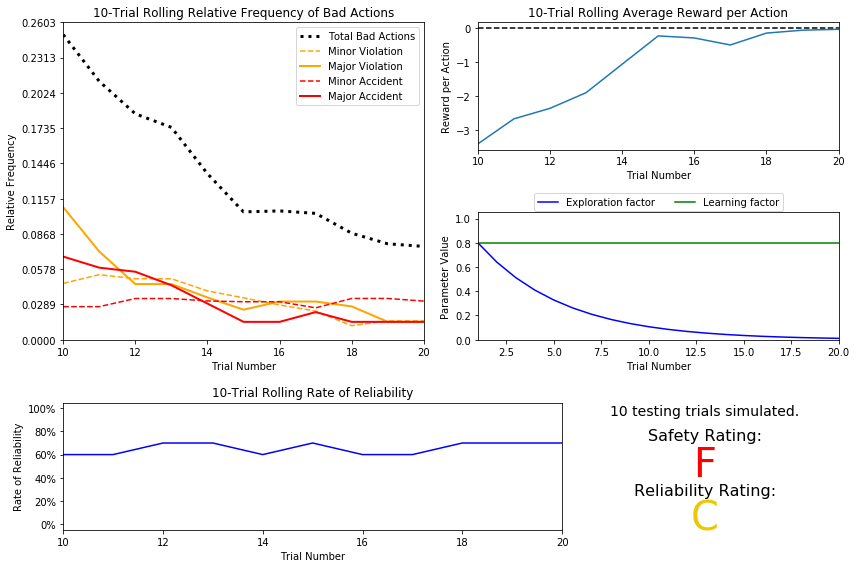

In [5]:
print("The decay function is epsilon = math.pow(alpha, t), epsilon {}, tolerance {}, alpha {}, tests {}" \
     .format(1.0, 0.025, 0.8, 10))
vs.plot_trials('sim_improved-learning_1.csv')

The decay function is epsilon = math.fabs(math.cos(.alpha*.t)), epsilon 1.0, tolerance 0.025, alpha 0.8 tetss 10


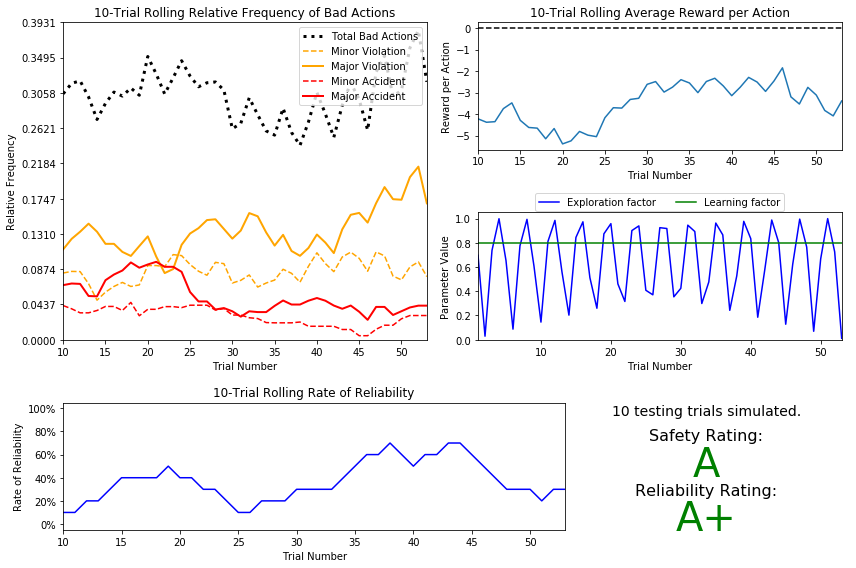

In [6]:
print("The decay function is epsilon = math.fabs(math.cos(.alpha*.t)), epsilon {}, tolerance {}, alpha {} tetss {}" \
     .format(1.0, 0.025, 0.8, 10))
vs.plot_trials('sim_improved-learning_2.csv')

The decay function is epsilon = math.fabs(math.cos(.alpha*.t)), epsilon 1.0, tolerance 0.025, alpha 0.8 tetss 20


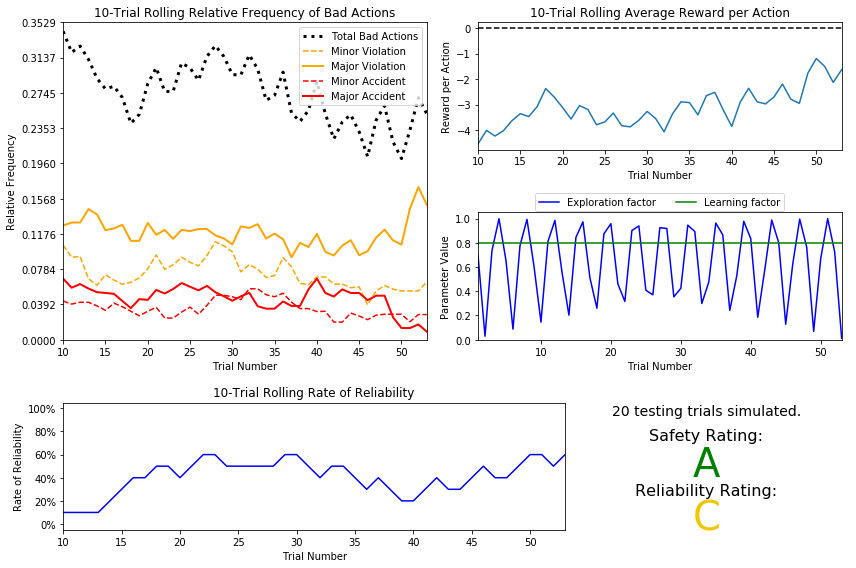

In [7]:
print("The decay function is epsilon = math.fabs(math.cos(.alpha*.t)), epsilon {}, tolerance {}, alpha {} tetss {}" \
     .format(1.0, 0.025, 0.8, 20))
vs.plot_trials('sim_improved-learning_21.csv')

The decay function is epsilon = 1.0/(t**2), epsilon 1.0, tolerance 0.025, alpha 0.8, tests


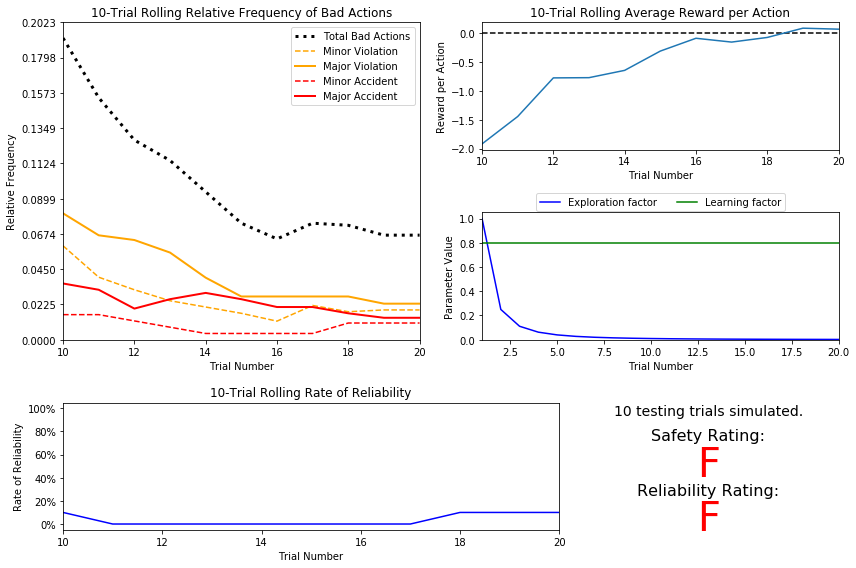

In [8]:
print("The decay function is epsilon = 1.0/(t**2), epsilon {}, tolerance {}, alpha {}, tests" \
     .format(1.0, 0.025, 0.8, 10))
vs.plot_trials('sim_improved-learning_3.csv')

The decay function is epsilon = epsilon * 0.97, epsilon 1.0, tolerance 0.025, alpha 0.8, tests 10


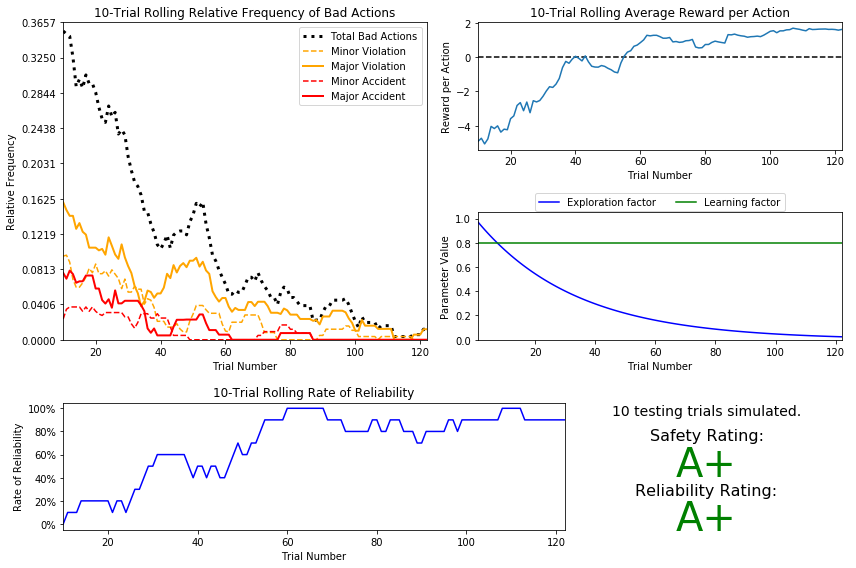

In [9]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("The decay function is epsilon = epsilon * 0.97, epsilon {}, tolerance {}, alpha {}, tests {}" \
     .format(1.0, 0.025, 0.8, 10))
vs.plot_trials('sim_improved-learning_4.csv')

The decay function is epsilon = epsilon * 0.97, epsilon 1.0, tolerance 0.025, alpha 0.8, tests 10


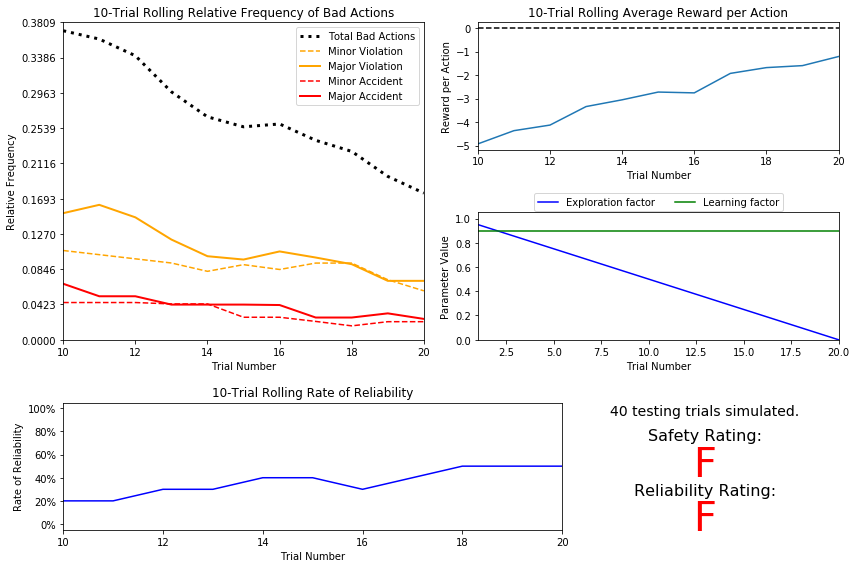

In [16]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("The decay function is epsilon = epsilon * 0.97, epsilon {}, tolerance {}, alpha {}, tests 10" \
     .format(1.0, 0.025, 0.8, 20))
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
- *What decaying function was used for epsilon (the exploration factor)?*<br>
    I have used several decay functions and finally I chose a recursive function of  of x = x*0.97<br>
    Here is the list of functions considered<br>
    
 
 |Decay function|Epsilon|Tolerance|Alpha|Num Tests|Num trials|Safety|reliability|
 |:--------------:|-------:|---------:|-----:|---------:|----|------|-----------|    
 |math.pow(alpha, t)|1.0|0.025|0.8|10|20|F|C|
 |math.fabs(math.cos(alpha * t))|1.0|0.025|55|0.8|10|A|A+|
 |math.fabs(math.cos(alpha * t))|1.0|0.025|55|0.8|20|A|C|
 |1.0/(t**2)|1.0|0.025|0.8|10|20|F|F
 |epsilon*0.97|1.0|0.025|0.8|10|120|A+|A+|
 |epsilon*0.97|1.0|0.025|0.8|20|120|A+|A+|

- *Approximately how many training trials were needed for your agent before begining testing?**<br>
    About 120 trials were executed before testing for the decay function chosen.*<br>
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*<br>
    I have used epsilon - tolerance of 1.0 & 0.025 respectively. This gives a broad range of trials before testing begins. <br>
    I have used alpha (learning rate) of 0.8. I wanted the agent to learn quickly within a short number of trials. <br>    
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*<br>
There is dramatic improvement as compared with the previous section in terms of the following <br>
    1) The number of trials increased from 20 to 120 because of the recursive decay function and reduced tolerance.<br>
    2) The learning rate was increased from 0.5 to 0.8 <br>
    3) The rate of reliability increase substantially to reach about 98%<br>
    4) The reliability and safety rating increased to A+.
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*<br>
    Yes. I would say that the agent has learned the appropriate policy based on the traials and tests conducted and the reliabilty & safety scores obtained. <br> 
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*<br>
    Yes. I am satisfied with the safety and the reliability ratings of the smartcab for the parameters chosen. This smartcab is appears to be a very good candidate for test launches based on the high safety and reliability score obtained.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 
I have chosen to have a state of ('Waypoint', 'light', inputs('oncoming'), inputs('left'))
With an assumption that most of accidents/violations happen only at the intersection either because of lack of knowledge/training or purely acting on instincts rather than a deliberate action.
This situation has been captured with 'choose_action' procedure where a given action happens either by selecting a known value from Q table or a random action if the epsilon is greater than an a random value.
I would inspect a few Q table values for the input light (red or green)

-- Consider cases where traffic light is ==red==. The expectation is that any movement in red light is fraught with possible violations along with associated penalities. <br>
1) Here the agent is discouraged from taking a left turn when the light is red with available traffic on the left.  
```
('left', 'red', 'right', 'left')
 -- None : 1.32
 -- forward : 0.00
 -- right : 0.00
 -- left : -32.15 
 ```
 2) Here is the agent is discouraged to take a left turn when the light is red, with no oncoming or left traffic.
 ```
 ('left', 'red', None, None)
 -- None : 2.90
 -- forward : -33.89
 -- right : 0.89
 -- left : -9.59
 ```
     I find that the Q table entries for the red light appears to be optimal.

-- Consider cases where traffic light is green. Here the expectation is the agent should allow the traffic to flow without being a hindrance. Let's consider a few cases from the Q table for this situation<br>

1) Here the agent is encouraged to take right turn when waypoint is right, light is green, oncoming forward, 
```
('right', 'green', 'forward', None)
 -- None : -4.17
 -- forward : 0.97
 -- right : 1.38
 -- left : 0.00
 ```
2) Here the agent is encouragedto move forward with the traffic when the waypoint forward, light green, no oncoming & left traffic forward.
```
('forward', 'green', None, 'forward')
 -- None : -4.38
 -- forward : 2.40
 -- right : 0.16
 -- left : 0.19
```
I have considered a few of the 92 entries available with Q table and based my analysis, I find that the agent has learnt the rewards and penalities associated with each action optimally to perform well. 



### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
The purpose of gamma is to consider future rewards for choosing an action now.<br>
1) In the simulation provided, the agent is presented with next waypoint and the deadline. However, the destination by itself is not provided to the agent. The agent weighs what action is appropriate from the Q table to maximize the rewards. Even though the waypoint is to the left, the agent is allowed to choose right turn at a given junction based on Q table. As long as the agent reaches the destination within the the deadline, the trip's success is recorded. The routes optimality is not included in the reward. The truck industry provides drivers with incentives if they reach on time & optimal mileage for gas consumption.

2) The environment itself chooses a random origin & destination for every trial which is not optimal. With Uber cab drivers vie for customer near the origin of the customer route.

I personally think the randomness of the action chosen by the agent in proportion to the value of epsilon introduces a level of uncertainty on the outcome. This uncertainity doesn't go hand-in-hand with future rewards. The degree of uncertainity should be minimal.
Some decay function quickly becomes low and the chances of a deliberate action is high. On the other hand slow decaying function can potentially generate more random actions which might result in penalties. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.